##  Import libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression

## Loading data from CSV

In [4]:
# Load each dataset into a separate DataFrame
df_chicago = pd.read_csv("~/desktop/Project_7/Chicago.csv")
df_san_francisco = pd.read_csv("~/desktop/Project_7/San Francisco.csv")
df_san_diego = pd.read_csv("~/desktop/Project_7/San Diego.csv")
df_new_york = pd.read_csv("~/desktop/Project_7/New York.csv")
df_los_angeles = pd.read_csv("~/desktop/Project_7/Los Angeles.csv")


## Visualizing rating distribution with histogram

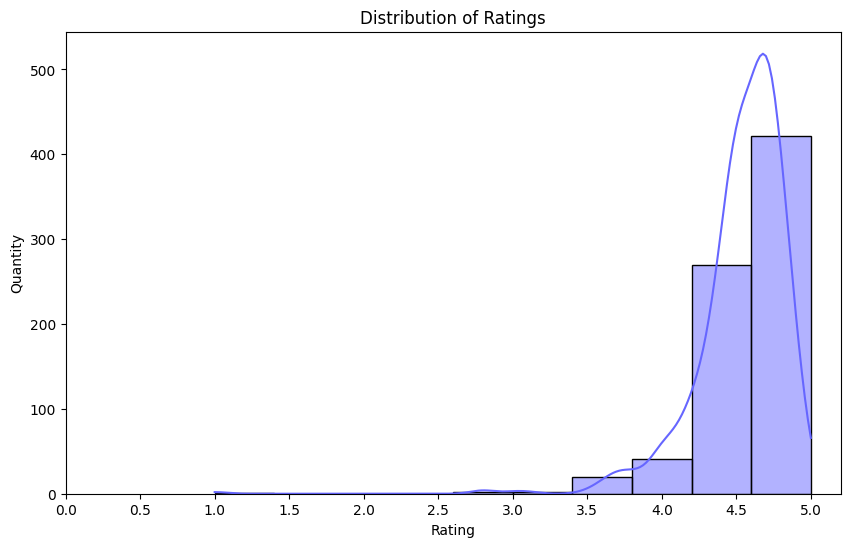

In [5]:
# Assuming 'df' is the DataFrame with a 'rating' column
plt.figure(figsize=(10, 6))
sns.histplot(df_san_francisco['rating'], kde=True, bins=10, color='#6666FF')

# Customize the x-axis ticks
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Quantity')

# Set x-ticks to show intervals
xticks = np.arange(0, 5.5, 0.5)
plt.xticks(xticks)
plt.grid(False)
plt.show()


## Visualizing distributions of various ratings (food, service, ambience, value)

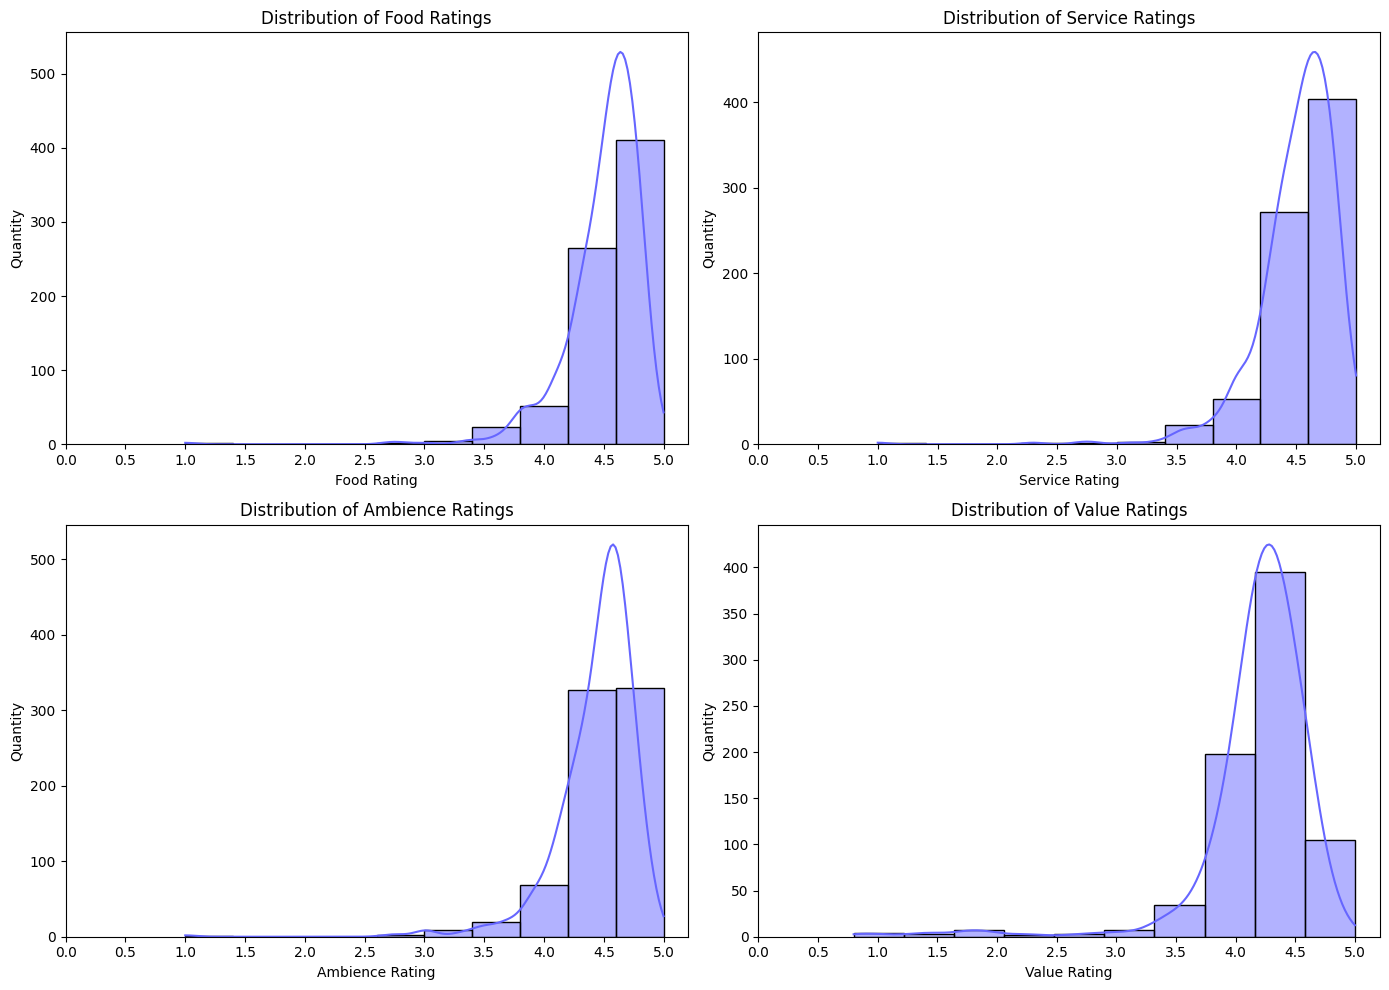

In [6]:
# Assuming your DataFrame is named 'df' and it contains the columns 'food', 'service', 'ambience', 'value'
columns = ['food', 'service', 'ambience', 'value'] 

# Titles and x-labels for the subplots
titles = ['Distribution of Food Ratings', 'Distribution of Service Ratings', 
          'Distribution of Ambience Ratings', 'Distribution of Value Ratings']
x_labels = ['Food Rating', 'Service Rating', 'Ambience Rating', 'Value Rating']

plt.figure(figsize=(14, 10))

# Create a histogram for each specified column
for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.histplot(df_san_francisco[column], kde=True, bins=10, color='#6666FF')
    
    # Customize the x-axis ticks and labels
    plt.title(titles[i])
    plt.xlabel(x_labels[i])  # Use the corresponding x-label for each subplot
    plt.ylabel('Quantity')

    # Set x-ticks to show intervals of 0.5, excluding 0.0
    xticks = np.arange(0, 5.5, 0.5)
    plt.xticks(xticks)
    plt.grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Generating a WordCloud from customer comments


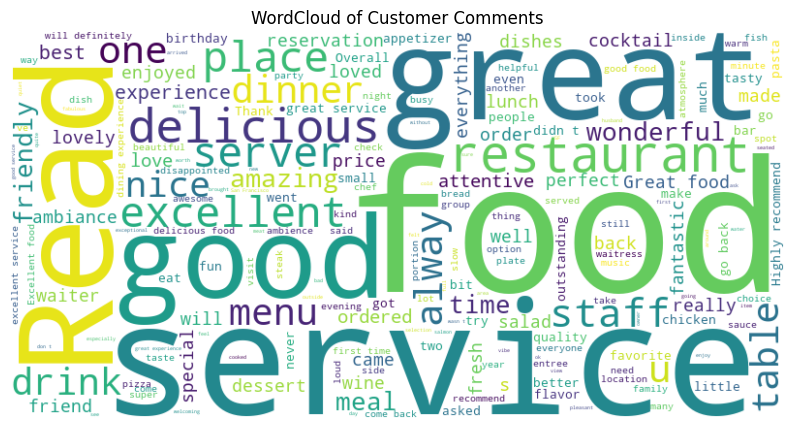

In [7]:
text = ' '.join(df_san_francisco['comments'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Customer Comments')
plt.show()

## Top 10 food types in restaurants

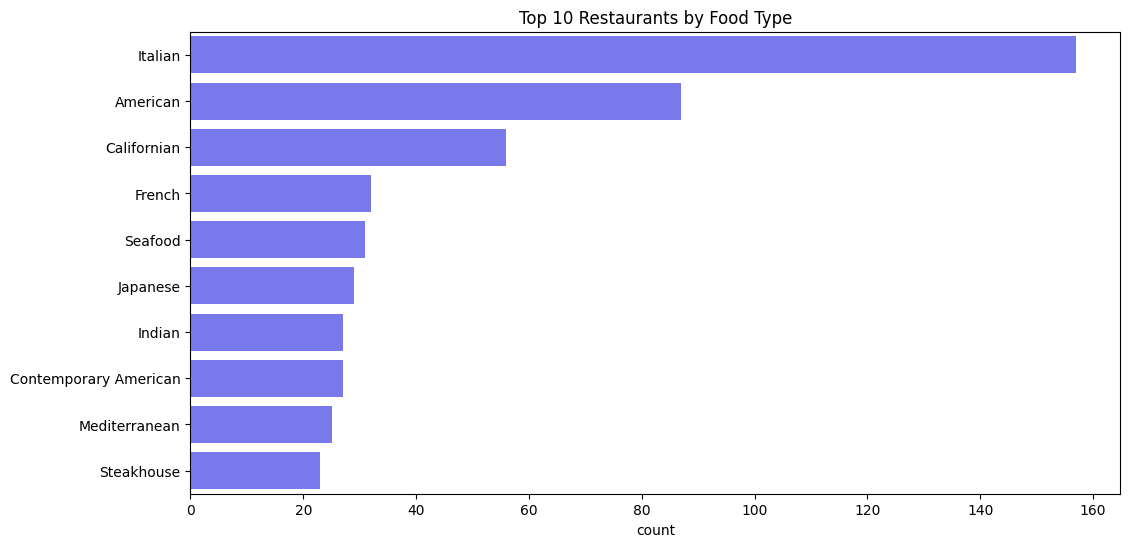

In [8]:
# Assuming 'df' is your DataFrame
top_food_types = df_san_francisco['food_type'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df_san_francisco[df_san_francisco['food_type'].isin(top_food_types)], y='food_type', order=top_food_types, color='#6666FF')
plt.title('Top 10 Restaurants by Food Type')
plt.xticks(rotation=0)
plt.ylabel('')
plt.grid(False)
plt.show()


## Scatter Plot of food vs. service ratings

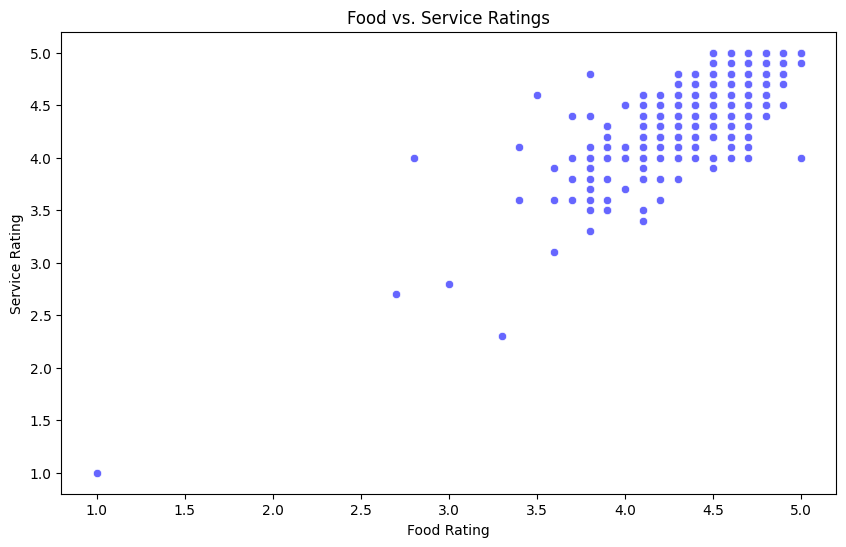

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='food', y='service', data=df_san_francisco, color='#6666FF')
plt.title('Food vs. Service Ratings')
plt.xlabel('Food Rating')
plt.ylabel('Service Rating')
plt.grid(False)
plt.show()

## Top 10 Restaurants by rating

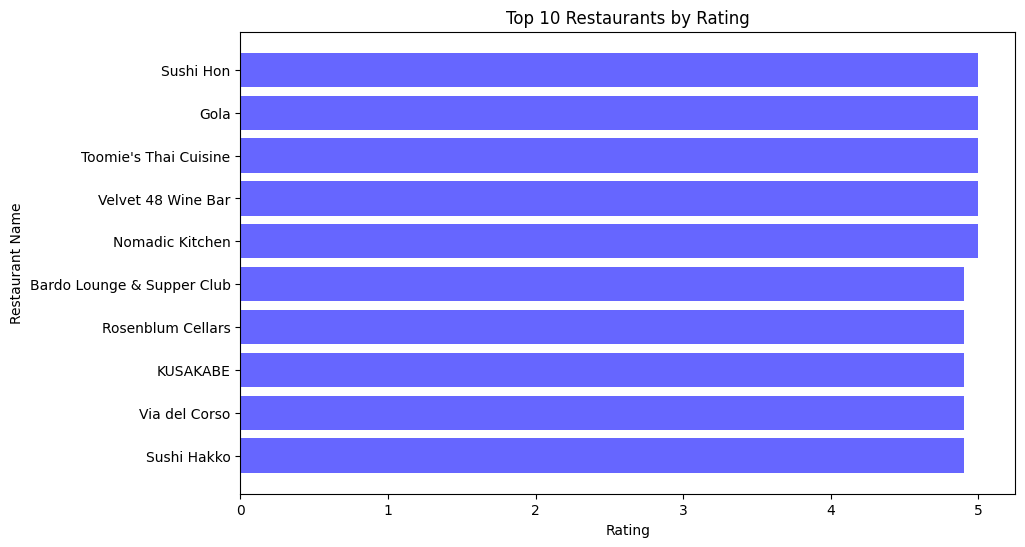

In [10]:
# Assuming df is your DataFrame containing restaurant data
top_ratings = df_san_francisco.nlargest(10, 'rating') 

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_ratings['rest_name'], top_ratings['rating'], color='#6666FF')
plt.title('Top 10 Restaurants by Rating')
plt.xlabel('Rating') 
plt.ylabel('Restaurant Name') 
plt.gca().invert_yaxis()  
plt.grid(False)
plt.show() 

## Top 10 Restaurants by Total Score

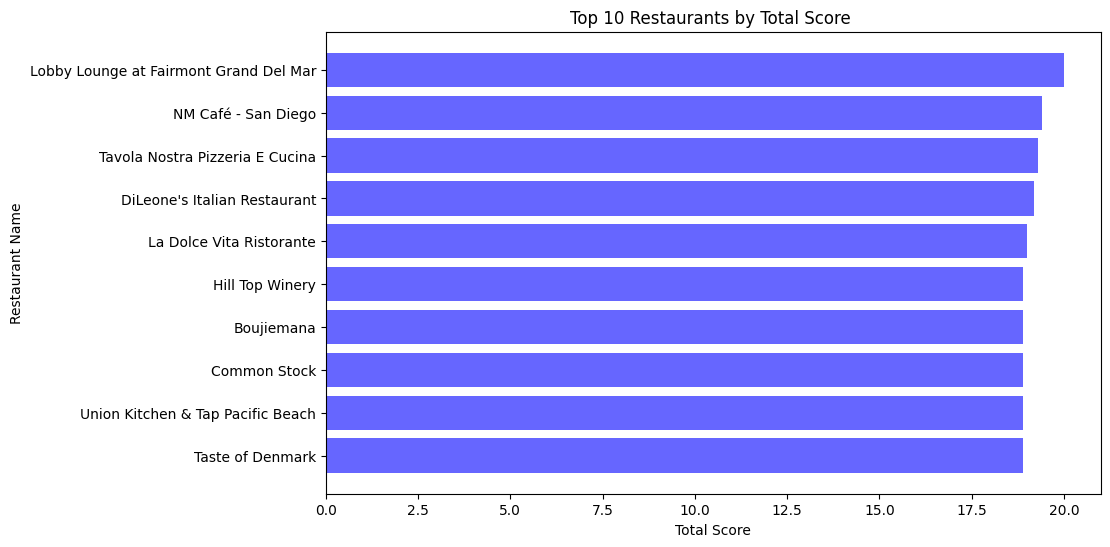

In [11]:

# Calculate the total score as the sum of food, ambience, value, and service
df_san_diego['total_score'] = df_san_diego[['food', 'ambience', 'value', 'service']].sum(axis=1)

# Get the top 10 restaurants based on the highest total score
top_expensive = df_san_diego.nlargest(10, 'total_score')

# Check if there are any missing values in the restaurant names
# Replace missing names with 'Unknown Restaurant' (if any)
top_expensive['rest_name'] = top_expensive['rest_name'].fillna('Unknown Restaurant')

# Ensure that restaurant names are treated as strings in case of any datatype inconsistencies
top_expensive['rest_name'] = top_expensive['rest_name'].astype(str)

# Create a bar chart for the total score
plt.figure(figsize=(10, 6))
plt.barh(top_expensive['rest_name'], top_expensive['total_score'], color='#6666FF')
plt.title('Top 10 Restaurants by Total Score ')
plt.xlabel('Total Score')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis() 
plt.grid(False)  
plt.show()


## Distribution of coupon types

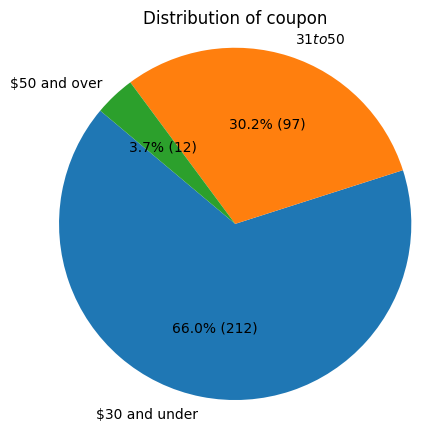

In [12]:
# Assuming 'df' is your DataFrame containing the 'coupon' information
food_counts = df_chicago['coupon'].value_counts().nlargest(5)  # Get the top 5 food types

# Define a function for autopct to show both percentage and count
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}% ({absolute})"
# Create a pie chart for the top 5 food types
plt.figure(figsize=(5, 5))
plt.pie(food_counts, labels=food_counts.index, 
        autopct=lambda pct: func(pct, food_counts), startangle=140)
plt.title('Distribution of coupon')
plt.axis('equal')  
plt.show()


## Correlation heatmap

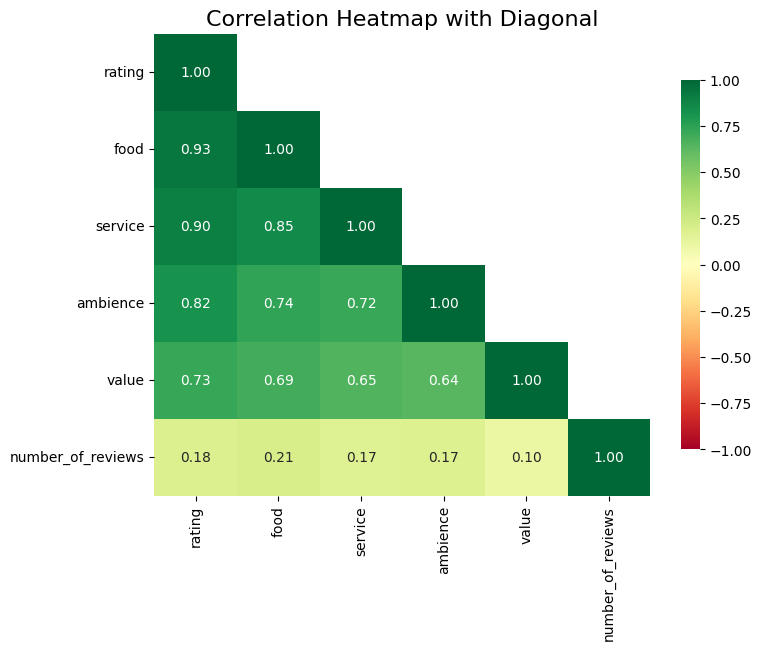

In [20]:


# Compute the correlation matrix
corr = df_chicago[['rating', 'food', 'service', 'ambience', 'value', 'number_of_reviews']].corr()

# Generate a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask, removing grid lines
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True, 
    fmt='.2f', 
    cmap='RdYlGn', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    linewidths=0,  # Remove grid lines
    cbar_kws={'shrink': 0.8}
)

# Add title
plt.title('Correlation Heatmap with Diagonal', fontsize=16)

# Display the plot
plt.show()


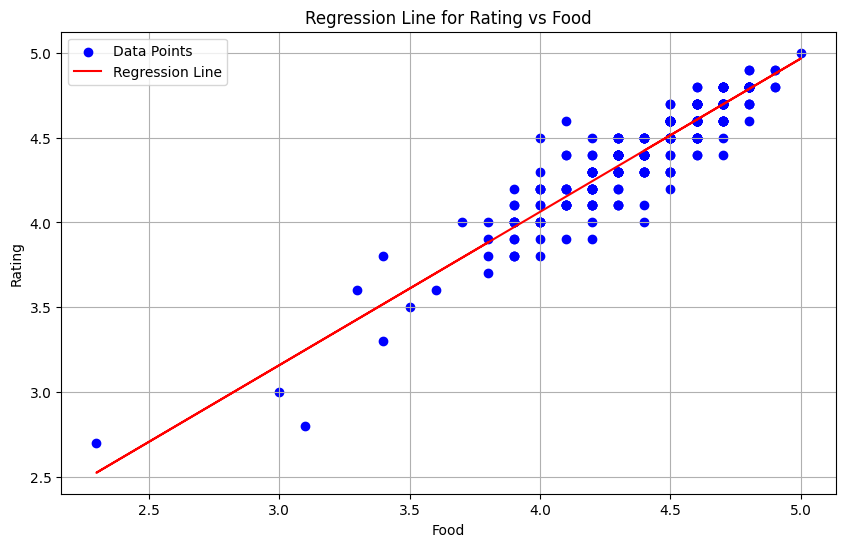

In [14]:
# Prepare the data
X = df_chicago[['food']]  # Choose one independent variable
y = df_chicago['rating']  # Dependent variable

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')  # Scatter plot of actual data
plt.plot(X, y_pred, color='red', label='Regression Line')  # Regression line
plt.title('Regression Line for Rating vs Food')
plt.xlabel('Food')
plt.ylabel('Rating')
plt.legend()
plt.grid()
plt.show()

## Top 10 Restaurants by number of reviews 

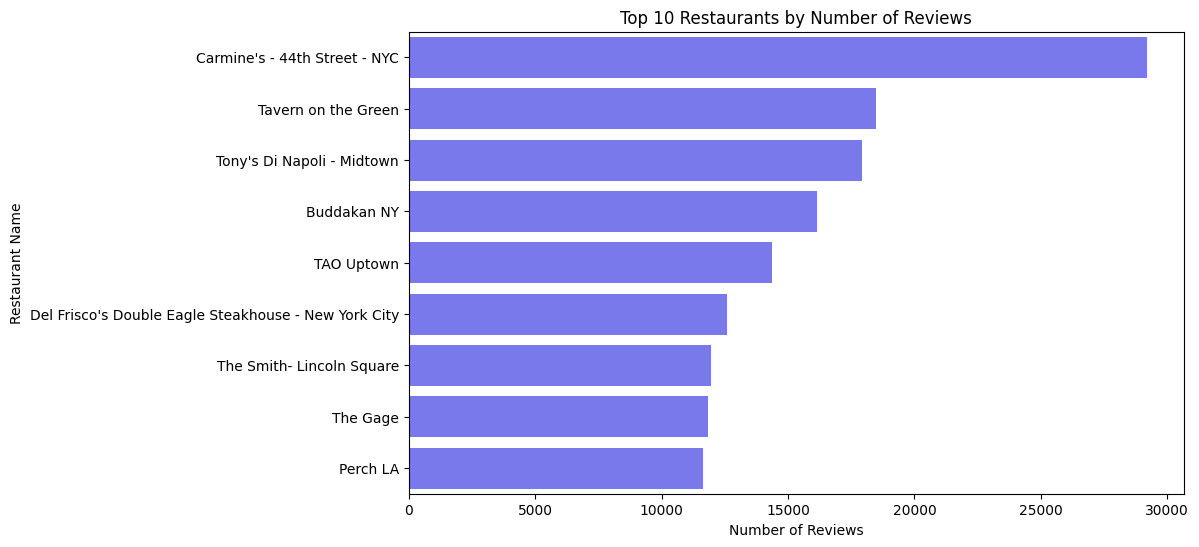

In [46]:
# Concatenate the DataFrames
all_data = pd.concat([df_chicago, df_san_francisco, df_san_diego, df_new_york, df_los_angeles])

# Convert 'number_of_reviews' to numeric, forcing errors to NaN
all_data['number_of_reviews'] = pd.to_numeric(all_data['number_of_reviews'], errors='coerce')

# Drop rows with NaN in 'number_of_reviews'
all_data.dropna(subset=['number_of_reviews'], inplace=True)

# Get the top 10 restaurants by number of reviews
top_10_restaurants = all_data.nlargest(10, 'number_of_reviews')

# Create a bar plot for the top 10 restaurants with specific color
plt.figure(figsize=(10,6))
sns.barplot(x='number_of_reviews', y='rest_name', data=top_10_restaurants, color='#6666FF')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()



## Top 10 Restaurants by number of reviews (Categorized by City)

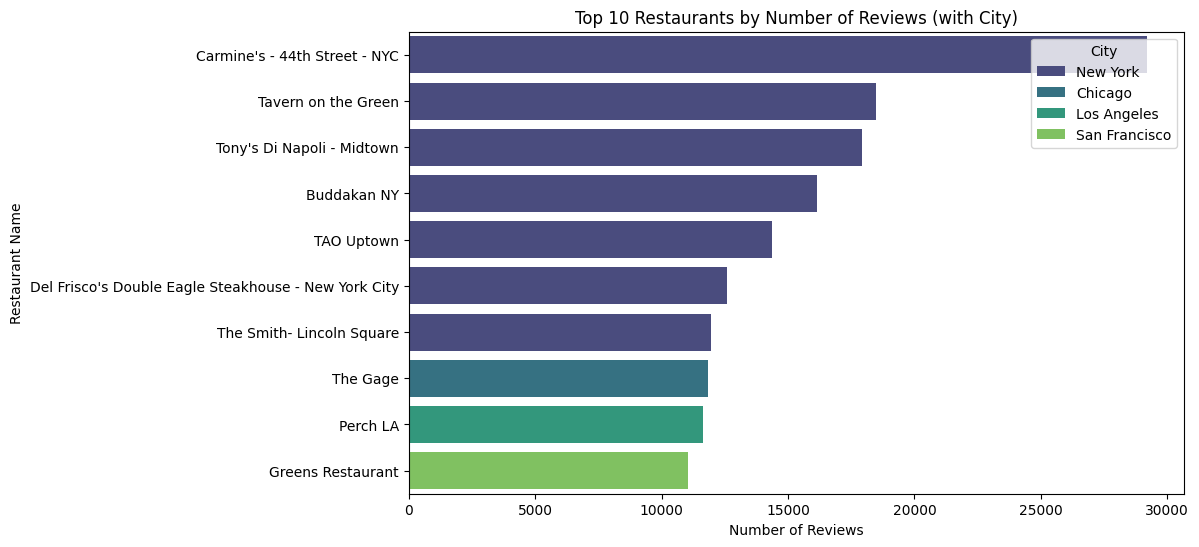

In [14]:
# Add a 'city' column to each DataFrame
df_chicago['city'] = 'Chicago'
df_san_francisco['city'] = 'San Francisco'
df_san_diego['city'] = 'San Diego'
df_new_york['city'] = 'New York'
df_los_angeles['city'] = 'Los Angeles'

# Concatenate the DataFrames
all_data = pd.concat([df_chicago, df_san_francisco, df_san_diego, df_new_york, df_los_angeles], ignore_index=True)

# Convert 'number_of_reviews' to numeric, forcing errors to NaN
all_data['number_of_reviews'] = pd.to_numeric(all_data['number_of_reviews'], errors='coerce')

# Drop rows with NaN in 'number_of_reviews'
all_data.dropna(subset=['number_of_reviews'], inplace=True)

# Get the top 10 restaurants by number of reviews
top_10_restaurants = all_data.nlargest(10, 'number_of_reviews')

# Create a bar plot for the top 10 restaurants, colored by city
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_reviews', y='rest_name', hue='city', data=top_10_restaurants, palette='viridis')
plt.title('Top 10 Restaurants by Number of Reviews (with City)')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.legend(title='City', loc='upper right')
plt.show()

## Top 5 restaurants with best service in Alberta

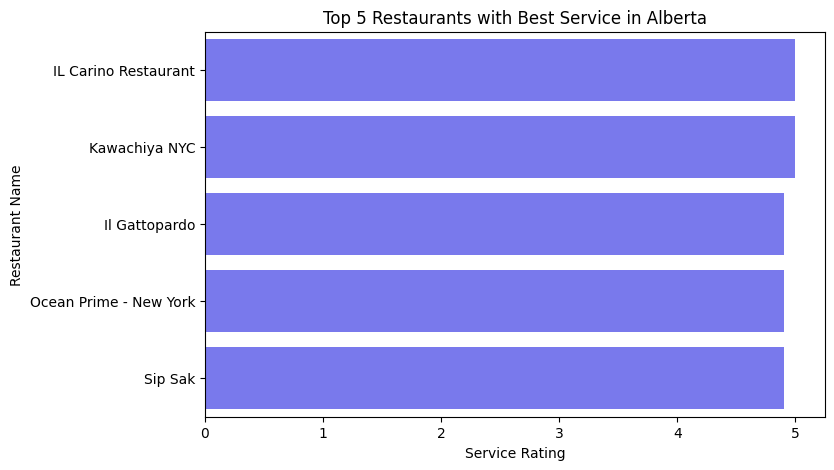

In [15]:
# Get top 5 restaurants by service in Alberta
top_5_service = df_new_york.nlargest(5, 'service')

# Create a bar plot for top 5 restaurants by service with specific color
plt.figure(figsize=(8,5))
sns.barplot(x='service', y='rest_name', data=top_5_service, color='#6666FF')
plt.title('Top 5 Restaurants with Best Service in Alberta')
plt.xlabel('Service Rating')
plt.ylabel('Restaurant Name')
plt.show()


##  Number of unique food types by city

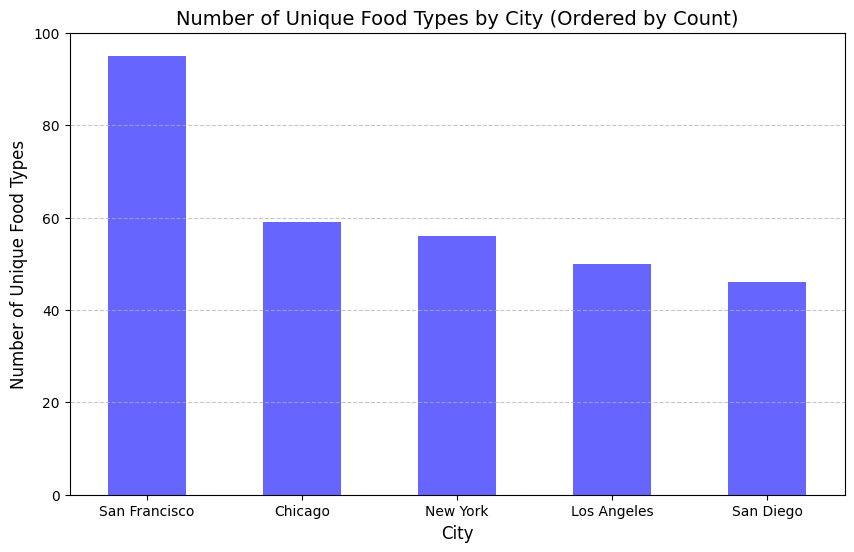

In [16]:
# Add a 'city' column to each DataFrame
df_chicago['city'] = 'Chicago'
df_san_francisco['city'] = 'San Francisco'
df_san_diego['city'] = 'San Diego'
df_new_york['city'] = 'New York'
df_los_angeles['city'] = 'Los Angeles'

# Concatenate the DataFrames
combined_data = pd.concat([df_chicago, df_san_francisco, df_san_diego, df_new_york, df_los_angeles])

# Count the unique food types for each city and sort by descending order
food_types_per_city = combined_data.groupby('city')['food_type'].nunique()
food_types_per_city_sorted = food_types_per_city.sort_values(ascending=False)

# Plot the sorted bar plot
plt.figure(figsize=(10, 6))
food_types_per_city_sorted.plot(kind='bar', color='#6666FF')
plt.title('Number of Unique Food Types by City (Ordered by Count)', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Unique Food Types', fontsize=12)
plt.xticks(rotation=0)
# Set y-axis limit
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Most common food types across cities

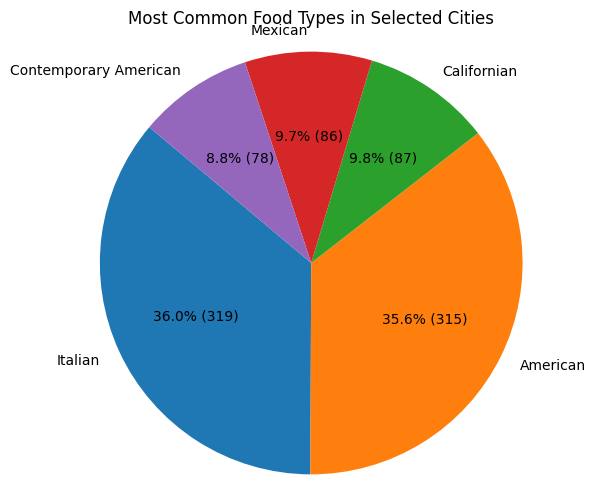

In [17]:

# Combine the datasets
combined_data = pd.concat([df_chicago, df_san_francisco, df_san_diego, df_new_york, df_los_angeles])

# Preparing data for the pie chart: count of the most common food types
common_food_count = combined_data.groupby('food_type').size().sort_values(ascending=False).head(5)

# Define a function for autopct to show both percentage and count
def func(pct, allvals):
    absolute = int(round(pct / 100. * sum(allvals)))
    return f"{pct:.1f}% ({absolute})"

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(common_food_count, labels=common_food_count.index, 
        autopct=lambda pct: func(pct, common_food_count), startangle=140)
plt.title('Most Common Food Types in Selected Cities')
plt.axis('equal')  
plt.show()
